# Tupak

In this notebook, we'll demonstrate how to use tupak for some of the problems already discussed.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tupak

08:15 tupak INFO    : Running tupak version: 0.2 - (UNCLEAN) 473e116 2018-07-11 12:39:12 +1000


In [3]:
tupak?

```python
Type:        module
String form: <module 'tupak' from '/home/user1/anaconda2/lib/python2.7/site-packages/tupak-0.2-py2.7.egg/tupak/__init__.pyc'>
File:        ~/anaconda2/lib/python2.7/site-packages/tupak-0.2-py2.7.egg/tupak/__init__.py
Docstring:  
tupak
=====

Tupak is The User friendly Parameter estimAtion Kode.

The aim of tupak is to provide user friendly interface to perform parameter
estimation. It is primarily designed and built for inference of compact
binary coalescence events in interferometric data, but it can also be used for
more general problems.

The code, and many examples are hosted at https://git.ligo.org/Monash/tupak.
For installation instructions see
https://monash.docs.ligo.org/tupak/installation.html.
```

In [4]:
tupak.run_sampler?

```python
Signature: tupak.run_sampler(likelihood, priors=None, label='label', outdir='outdir', sampler='dynesty', use_ratio=None, injection_parameters=None, conversion_function=None, plot=False, default_priors_file=None, clean=None, meta_data=None, **kwargs)
Docstring:
The primary interface to easy parameter estimation

Parameters
----------
likelihood: `tupak.Likelihood`
    A `Likelihood` instance
priors: `tupak.PriorSet`
    A PriorSet/dictionary of the priors for each parameter - missing parameters will
    use default priors, if None, all priors will be default
label: str
    Name for the run, used in output files
outdir: str
    A string used in defining output files
sampler: str
    The name of the sampler to use - see
    `tupak.sampler.get_implemented_samplers()` for a list of available
    samplers
```

Okay, let's look at the sinusoid in noise again.

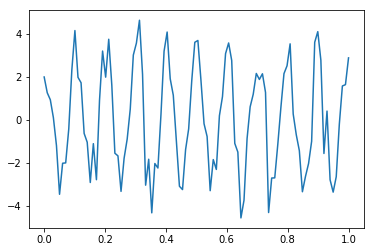

In [5]:
A = 3
f = 10
phi = 1.4
sigma = 1
N = 100
x = np.linspace(0, 1, N)
y = A * np.sin(2*np.pi*f*x + phi) + np.random.normal(0, sigma, N)
plt.plot(x, y)
plt.show()

### Setting up the problem in tupak

In [6]:
def function(x, A, f, phi):
    return A * np.sin(2*np.pi*f*x + phi)

priors = {}
priors['A'] = tupak.prior.Uniform(0, 10, 'A', latex_label='A')
priors['f'] = tupak.prior.Uniform(0, 20, 'f', latex_label='f')
priors['phi'] = tupak.prior.Uniform(0, 2*np.pi, 'phi', latex_label='$\phi$')
priors['sigma'] = tupak.prior.Uniform(0, 1.5, 'sigma', latex_label='$\sigma$')

likelihood = tupak.core.likelihood.GaussianLikelihood(x, y, function)
result = tupak.run_sampler(likelihood=likelihood, priors=priors, nlive=1000)

08:15 tupak INFO    : Search parameters:
08:15 tupak INFO    :   A = Uniform(name='A', latex_label='A', minimum=0, maximum=10)
08:15 tupak INFO    :   phi = Uniform(name='phi', latex_label='$\\phi$', minimum=0, maximum=6.283185307179586)
08:15 tupak INFO    :   sigma = Uniform(name='sigma', latex_label='$\\sigma$', minimum=0, maximum=1.5)
08:15 tupak INFO    :   f = Uniform(name='f', latex_label='f', minimum=0, maximum=20)
08:15 tupak INFO    : Single likelihood evaluation took 6.300e-05 s
08:15 tupak INFO    : Using sampler Dynesty with kwargs {'dlogz': 0.1, 'verbose': True, 'resume': True, 'n_check_point': 10000000, 'bound': 'multi', 'sample': 'rwalk', 'nlive': 1000, 'walks': 20, 'update_interval': 600, 'check_point_delta_t': 600}
 17628| logz=-145.721 +/-  0.117 | dlogz:  0.000 >  0.1000000

08:17 tupak INFO    : Sampling time: 0:02:13.431130
08:17 tupak INFO    : Sampling finished, results saved to outdir/
08:17 tupak INFO    : Summary of results:
nsamples: 18628
log_evidence: -145.721 +/-  0.117



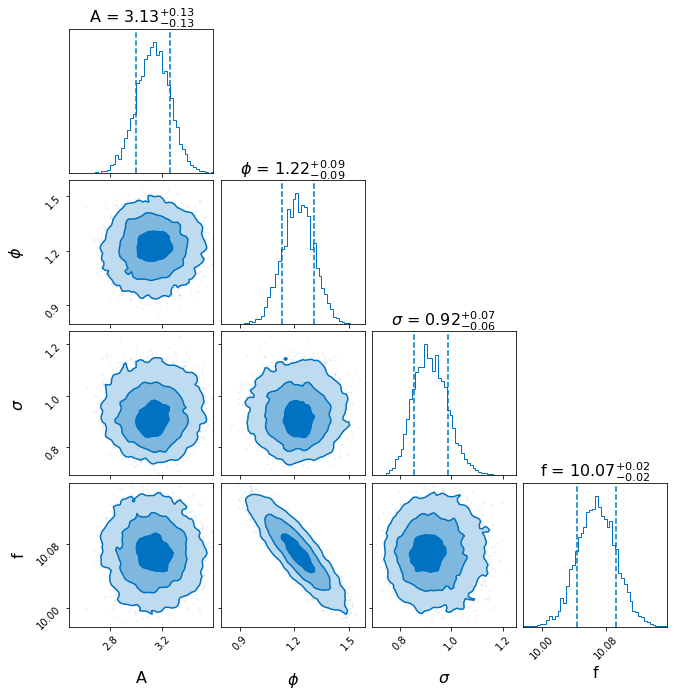

In [7]:
result.plot_corner()
plt.show()

### Changing the sampler

In [8]:
likelihood = tupak.core.likelihood.GaussianLikelihood(x, y, function)
result = tupak.run_sampler(likelihood=likelihood, priors=priors, sampler='ptemcee', nsteps=1000, nburn=200, ntemps=2)

08:17 tupak INFO    : Search parameters:
08:17 tupak INFO    :   A = Uniform(name='A', latex_label='A', minimum=0, maximum=10)
08:17 tupak INFO    :   phi = Uniform(name='phi', latex_label='$\\phi$', minimum=0, maximum=6.283185307179586)
08:17 tupak INFO    :   sigma = Uniform(name='sigma', latex_label='$\\sigma$', minimum=0, maximum=1.5)
08:17 tupak INFO    :   f = Uniform(name='f', latex_label='f', minimum=0, maximum=20)
08:17 tupak INFO    : Single likelihood evaluation took 5.200e-05 s
08:17 tupak INFO    : Using sampler Ptemcee with kwargs {'nburn': 200, 'ntemps': 2, 'nsteps': 1000}
100%|██████████| 1000/1000 [00:54<00:00, 18.45it/s]
08:18 tupak INFO    : Max autocorr time = 82.0149345931
08:18 tupak INFO    : Tswap frac = [0.09235 0.09235]
08:18 tupak INFO    : Sampling time: 0:00:54.270061
08:18 tupak INFO    : Sampling finished, results saved to outdir/
08:18 tupak INFO    : Summary of results:
nsamples: 80000
log_evidence:    nan +/-    nan



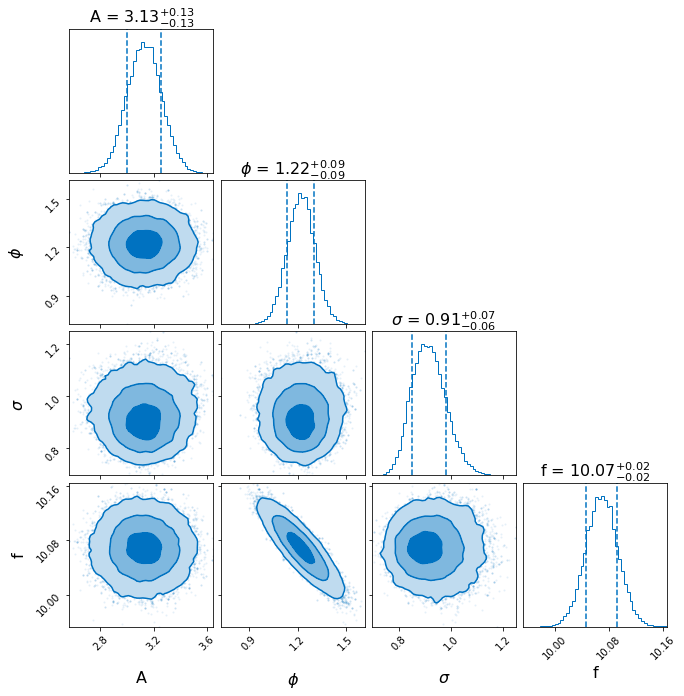

In [9]:
result.plot_corner()
plt.show()